<h3> 1. 모델 라이브러리 불러오기 </h3>
<p> 데이터 : 와인 데이터 이용 </p>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams['font.family'] = 'Malgun Gothic'

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [31]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df['target'] = wine.target

<h3> 2. KNN Algorithm </h3>

In [32]:
from sklearn.neighbors import KNeighborsClassifier

X = df.drop('target', axis = 1)
y = df['target']

# 학습 데이터와 검증 데이터를 8 : 2로 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

Text(0, 0.5, 'Error (misclassification) Rate')

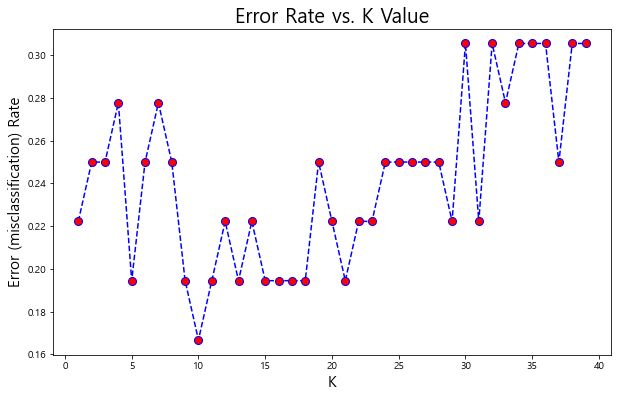

In [33]:
error_rate = [] # 각 k값 별로 error값 저장

# 1부터 40까지의 k값을 학습시키고 error 측정
for k in range(1, 40):
    knn_clf = KNeighborsClassifier(n_neighbors = k)
    knn_clf.fit(X_train, y_train)
    knn_pred = knn_clf.predict(X_test)
    error = np.mean(knn_pred != y_test)
    error_rate.append(error)

# k값에 따른 error rate 시각화
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)

In [53]:
import warnings
warnings.filterwarnings('ignore')

<h3> 3. KMeans Algorithm </h3>

In [54]:
from sklearn.cluster import KMeans

data_df = df.drop('target', axis = 1) 
model = KMeans(n_clusters = 3, n_init = 10, algorithm = 'auto', init = 'k-means++') # 초기 중심점 설정과 군집 개수 설정
model.fit(data_df) # 설정한 파라미터를 토대로 군집화
predict = model.predict(data_df)

# 시각화 하기 위해 2차원으로 차원 축소(실제로는 13차원, 설명률 : 99.8%)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) 
pca.fit(data_df)
pca_df = pd.DataFrame(pca.transform(data_df), columns = ['pca_1', 'pca_2'])
pca_df['cluster'] = predict
pca.explained_variance_ratio_

array([0.99809123, 0.00173592])

In [65]:
pca_df.head(5)

,pca_1,pca_2,cluster
0,318.562979,21.492131,2
1,303.097420,-5.364718,2
2,438.061133,-6.537309,2
3,733.240139,0.192729,2
4,-11.571428,18.489995,0


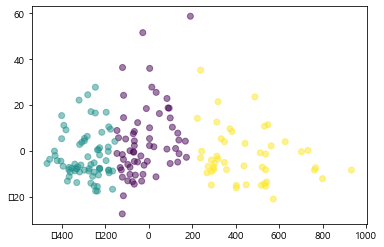

In [63]:
plt.scatter(pca_df['pca_1'], pca_df['pca_2'],c=pca_df['cluster'],alpha=0.5)

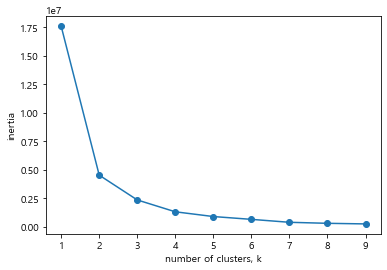

In [64]:
ks = range(1,10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data_df)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

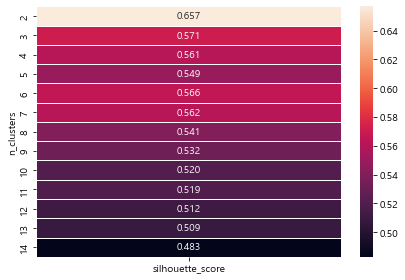

In [69]:
from sklearn.metrics import silhouette_score #실루엣 스코어 계산 위한 라이브러리 임포트
clusters_range = range(2,15) #지정할 클러스터 개수
results = []

for i in clusters_range: #실루엣 스코어 계산
    clusterer = KMeans(n_clusters=i, init='k-means++', n_init=10, algorithm = 'auto')
    cluster_labels = clusterer.fit_predict(data_df)
    silhouette_avg = silhouette_score(data_df, cluster_labels)
    results.append([i, silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

plt.figure()
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
plt.tight_layout()
plt.show()

In [71]:
!pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)


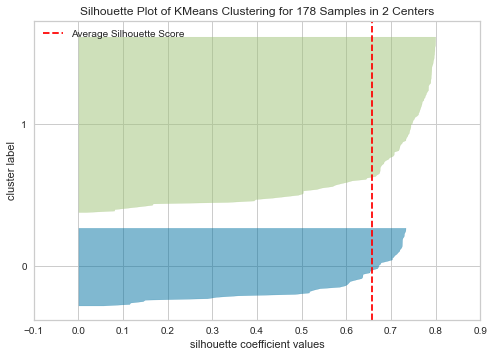

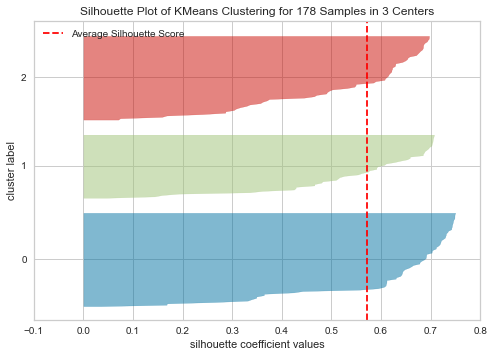

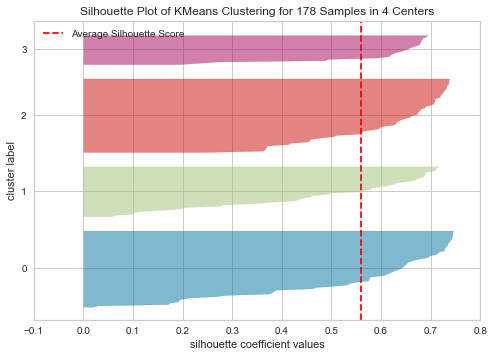

In [74]:
from yellowbrick.cluster import SilhouetteVisualizer

cluster_range = range(2, 5)
#클러스터링 모델 생성
for cluster in cluster_range:
    kmeans_2 = KMeans(n_clusters=cluster, init='k-means++', algorithm = 'auto', n_init = 10)
    #visualizer 생성
    visualizer_2 = SilhouetteVisualizer(kmeans_2, colors='yellowbrick')
    #생성된 visualizer에 데이터 입력 
    visualizer_2.fit(data_df)      
    visualizer_2.show()